In [3]:
import pandas as pd
import connect_tools as ct
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def champions_stats():
    """Create a database with statistics of champions for each position."""
    password = ""
    connexion = ct.Connect_Tools(password=password)
    df_matches = connexion.read_db(table_name="matches")
    df_champions= connexion.read_db(table_name="champions_list")

    def c_c(column : str):
        x = df_matches[column]
        y = df_champions["name_champ"]
        compte = []
        for i in y:
            co =  x.eq(i).sum()
            compte.append(co)
        return compte
    
    def c_av(column : str):
        x = df_matches[column]
        w = df_matches["win_side"]
        y = df_champions["name_champ"]
        av_win = []
        for i in y:
            loc = x.eq(i)
            ind = loc[loc].index
            av = w.loc[ind].mean()
            if "red" in column:
                av = 1-av
            else:
                pass
            av_win.append(av)
        return av_win

    parametres = {"Champions": df_champions["name_champ"], "Red Top" : c_c("red_top"), "Red Top Mean" : c_av("red_top"),
                "Red Jungle" : c_c("red_jun"), "red Jungle Mean" : c_av("red_jun"), "Red Mid" : c_c("red_mid"),
                "Red Mid Mean" : c_av("red_mid"), "Red Bot" : c_c("red_bot"), "Red Bot Mean" : c_av("red_bot"),
                "Red Sup" : c_c("red_sup"), "Red Sup Mean" : c_av("red_sup"),
                "Blue Top" : c_c("blu_top"), "Blue Top Mean" : c_av("blu_top"),
                "Blue Jungle" : c_c("blu_jun"), "Blue Jungle Mean" : c_av("blu_jun"), "Blue Mid" : c_c("blu_mid"),
                "Blue Mid Mean" : c_av("blu_mid"), "Blue Bot" : c_c("blu_bot"), "Blue Bot Mean" : c_av("blu_bot"),
                "Blue Sup" : c_c("blu_sup"), "Blue Sup Mean" : c_av("blu_sup")
                }

    df_stats = pd.DataFrame(parametres)
    connexion.insert_db(dataframe = df_stats, table_name = "champions_stats")
    connexion.close_conn()

In [3]:
champions_stats()

In [4]:
password = ""
connexion = ct.Connect_Tools(password=password)

df_stats = connexion.read_db(table_name="champions_stats")
print(df_stats)

    Champions  Red Top  Red Top Mean  Red Jungle  red Jungle Mean  Red Mid  \
0      Aatrox     2104      0.503327           2         0.500000       50   
1        Ahri       24      0.541667           0              NaN     2602   
2       Akali      484      0.524793           1         0.000000     1160   
3      Akshan      214      0.570093           1         1.000000      684   
4     Alistar       14      0.571429           2         0.000000        8   
..        ...      ...           ...         ...              ...      ...   
162      Zeri       26      0.500000           1         1.000000       17   
163     Ziggs        0           NaN           0              NaN      105   
164    Zilean       35      0.628571           0              NaN       62   
165       Zoe       10      0.400000           0              NaN      323   
166      Zyra        2      0.500000         112         0.535714       11   

     Red Mid Mean  Red Bot  Red Bot Mean  Red Sup  ...  Blue To

In [7]:
df_stats.head()

,Champions,Red Top,Red Top Mean,Red Jungle,red Jungle Mean,Red Mid,Red Mid Mean,Red Bot,Red Bot Mean,Red Sup,...,Blue Top,Blue Top Mean,Blue Jungle,Blue Jungle Mean,Blue Mid,Blue Mid Mean,Blue Bot,Blue Bot Mean,Blue Sup,Blue Sup Mean
0,Aatrox,2104,0.503327,2,0.5,50,0.480000,1,1.000000,2,...,2452,0.464927,4,0.5,43,0.488372,1,1.000000,4,0.500000
1,Ahri,24,0.541667,0,NaN,2602,0.556879,3,0.000000,7,...,29,0.620690,0,NaN,2581,0.495544,3,0.333333,7,0.571429
2,Akali,484,0.524793,1,0.0,1160,0.522414,0,NaN,1,...,494,0.441296,0,NaN,1069,0.479888,0,NaN,0,NaN
3,Akshan,214,0.570093,1,1.0,684,0.546784,31,0.483871,4,...,188,0.505319,0,NaN,562,0.501779,32,0.437500,5,0.600000
4,Alistar,14,0.571429,2,0.0,8,0.625000,0,NaN,988,...,11,0.363636,2,0.0,12,0.666667,0,NaN,953,0.488982


In [9]:
print(df_stats["Red Top"].sort_values())

29        0
163       0
52        0
134       0
124       0
       ... 
106    1275
32     1333
23     1507
38     1662
0      2104
Name: Red Top, Length: 167, dtype: int64


In [11]:
def counter_stats():
    password = ""
    connexion = ct.Connect_Tools(password=password)
    df_matches = connexion.read_db(table_name="matches")
    df_matches.dropna(inplace=True)
    df_champions= connexion.read_db(table_name="champions_list")
    list_champ = df_champions["name_champ"].to_list()
    
    # Minoritization function applied on percent of game played for a champion. Create a representation of victory reliability.

    def fonction_log(x):
        k = -np.log(0.001)
        return 1 - np.exp(-k * x)
    
    # Verified match-up position of k and c in dataframe

    def verified_position(val, k, c):
        if val.index(k) in range(6,11):
            k_index = val.index(k)
            c_index = val.index(c)
            if k_index - c_index == 5 and val[11] == 1:
                return 1
            elif k_index - c_index == 5 and val[11] == 0:
                return 0
            else:
                return False
        else:
            return False

    # Create a dictionnary for counters dataframe
        
    b = "blu_"
    r = "red_"    
    temp_df_cs = {b + col: [] for col in list_champ}
    for col, position in temp_df_cs.items():
        index_df_cs = {r + ind + "_" + col : [] for ind in list_champ}
        position.append(index_df_cs)

    # Iterate all combinations of 2 champions, found correspondance in dataframe and return value for win side.
        
    for index, row in df_matches.iterrows():
        val = list(row.values)
        for k in list_champ:
            for c in list_champ:
                if k == c :
                    if len(temp_df_cs[b+k][0][r+c+"_"+b+k]) == 0:
                        temp_df_cs[b+k][0][r+c+"_"+b+k].append(None)
                    else:
                        continue
                elif all(x in val for x in[k,c]) and verified_position(val, k, c) is not False:
                    vp = verified_position(val, k, c)
                    if vp == 1:
                        temp_df_cs[b+k][0][r+c+"_"+b+k].append(1)

                    elif vp == 0:
                        temp_df_cs[b+k][0][r+c+"_"+b+k].append(0)

                else:
                    continue
    
    # Create dict for all champions with mean of win and the nomber of game in tuple
                
    df_counter = {b + col : [] for col in list_champ}

    for col, position in temp_df_cs.items():
        for i, e in position[0].items():
            if e == [None]:
                df_counter[col].append(None)
                continue
            elif len(e) != 0 :
                stat_tuple = (sum(e)/len(e),len(e))
                df_counter[col].append(stat_tuple)
            elif len(e) == 0:
                df_counter[col].append(None)
            else:
                continue

    def index_mino_trans(position):

        def fonction_log(x): # Minoritization function. Create a representation of victory reliability.
            k = -np.log(0.001)
            return 1 - np.exp(-k * x)
        n_list = []
        total_games = sum(i[1] for i in position if i is not None)

        for i in position:
            if i is None:
                n_list.append(None)
            else:
                x = i[1]/total_games
                ind_min = fonction_log(x)
                n_i = round(i[0]*ind_min,2)
                n_list.append(n_i)
        return n_list

    for col, position in df_counter.items():
        df_counter[col] = index_mino_trans(position)
    
    df_counter_f = pd.DataFrame(df_counter, index=["red_" + i for i in list_champ])
        
    return df_counter_f

In [12]:
test = counter_stats()

In [87]:
password = ""
connexion = ct.Connect_Tools(password=password)
connexion.insert_db(dataframe= test, table_name="counter_stats")

In [13]:
print(test)

             blu_Aatrox  blu_Ahri  blu_Akali  blu_Akshan  blu_Alistar  \
red_Aatrox          NaN      0.02       0.07        0.04          NaN   
red_Ahri           0.01       NaN       0.11        0.12          NaN   
red_Akali          0.05      0.07        NaN        0.11         0.01   
red_Akshan         0.01      0.05       0.04         NaN          NaN   
red_Alistar         NaN      0.00        NaN         NaN          NaN   
...                 ...       ...        ...         ...          ...   
red_Zeri           0.00      0.00        NaN        0.00          NaN   
red_Ziggs           NaN      0.01        NaN        0.02          NaN   
red_Zilean         0.00      0.01       0.00        0.00         0.05   
red_Zoe            0.00      0.04       0.03        0.00         0.00   
red_Zyra            NaN      0.00        NaN         NaN         0.03   

             blu_Amumu  blu_Anivia  blu_Annie  blu_Aphelios  blu_Ashe  ...  \
red_Aatrox         NaN        0.02       0.02

In [14]:
df_counter = test.fillna(0)

<Axes: >

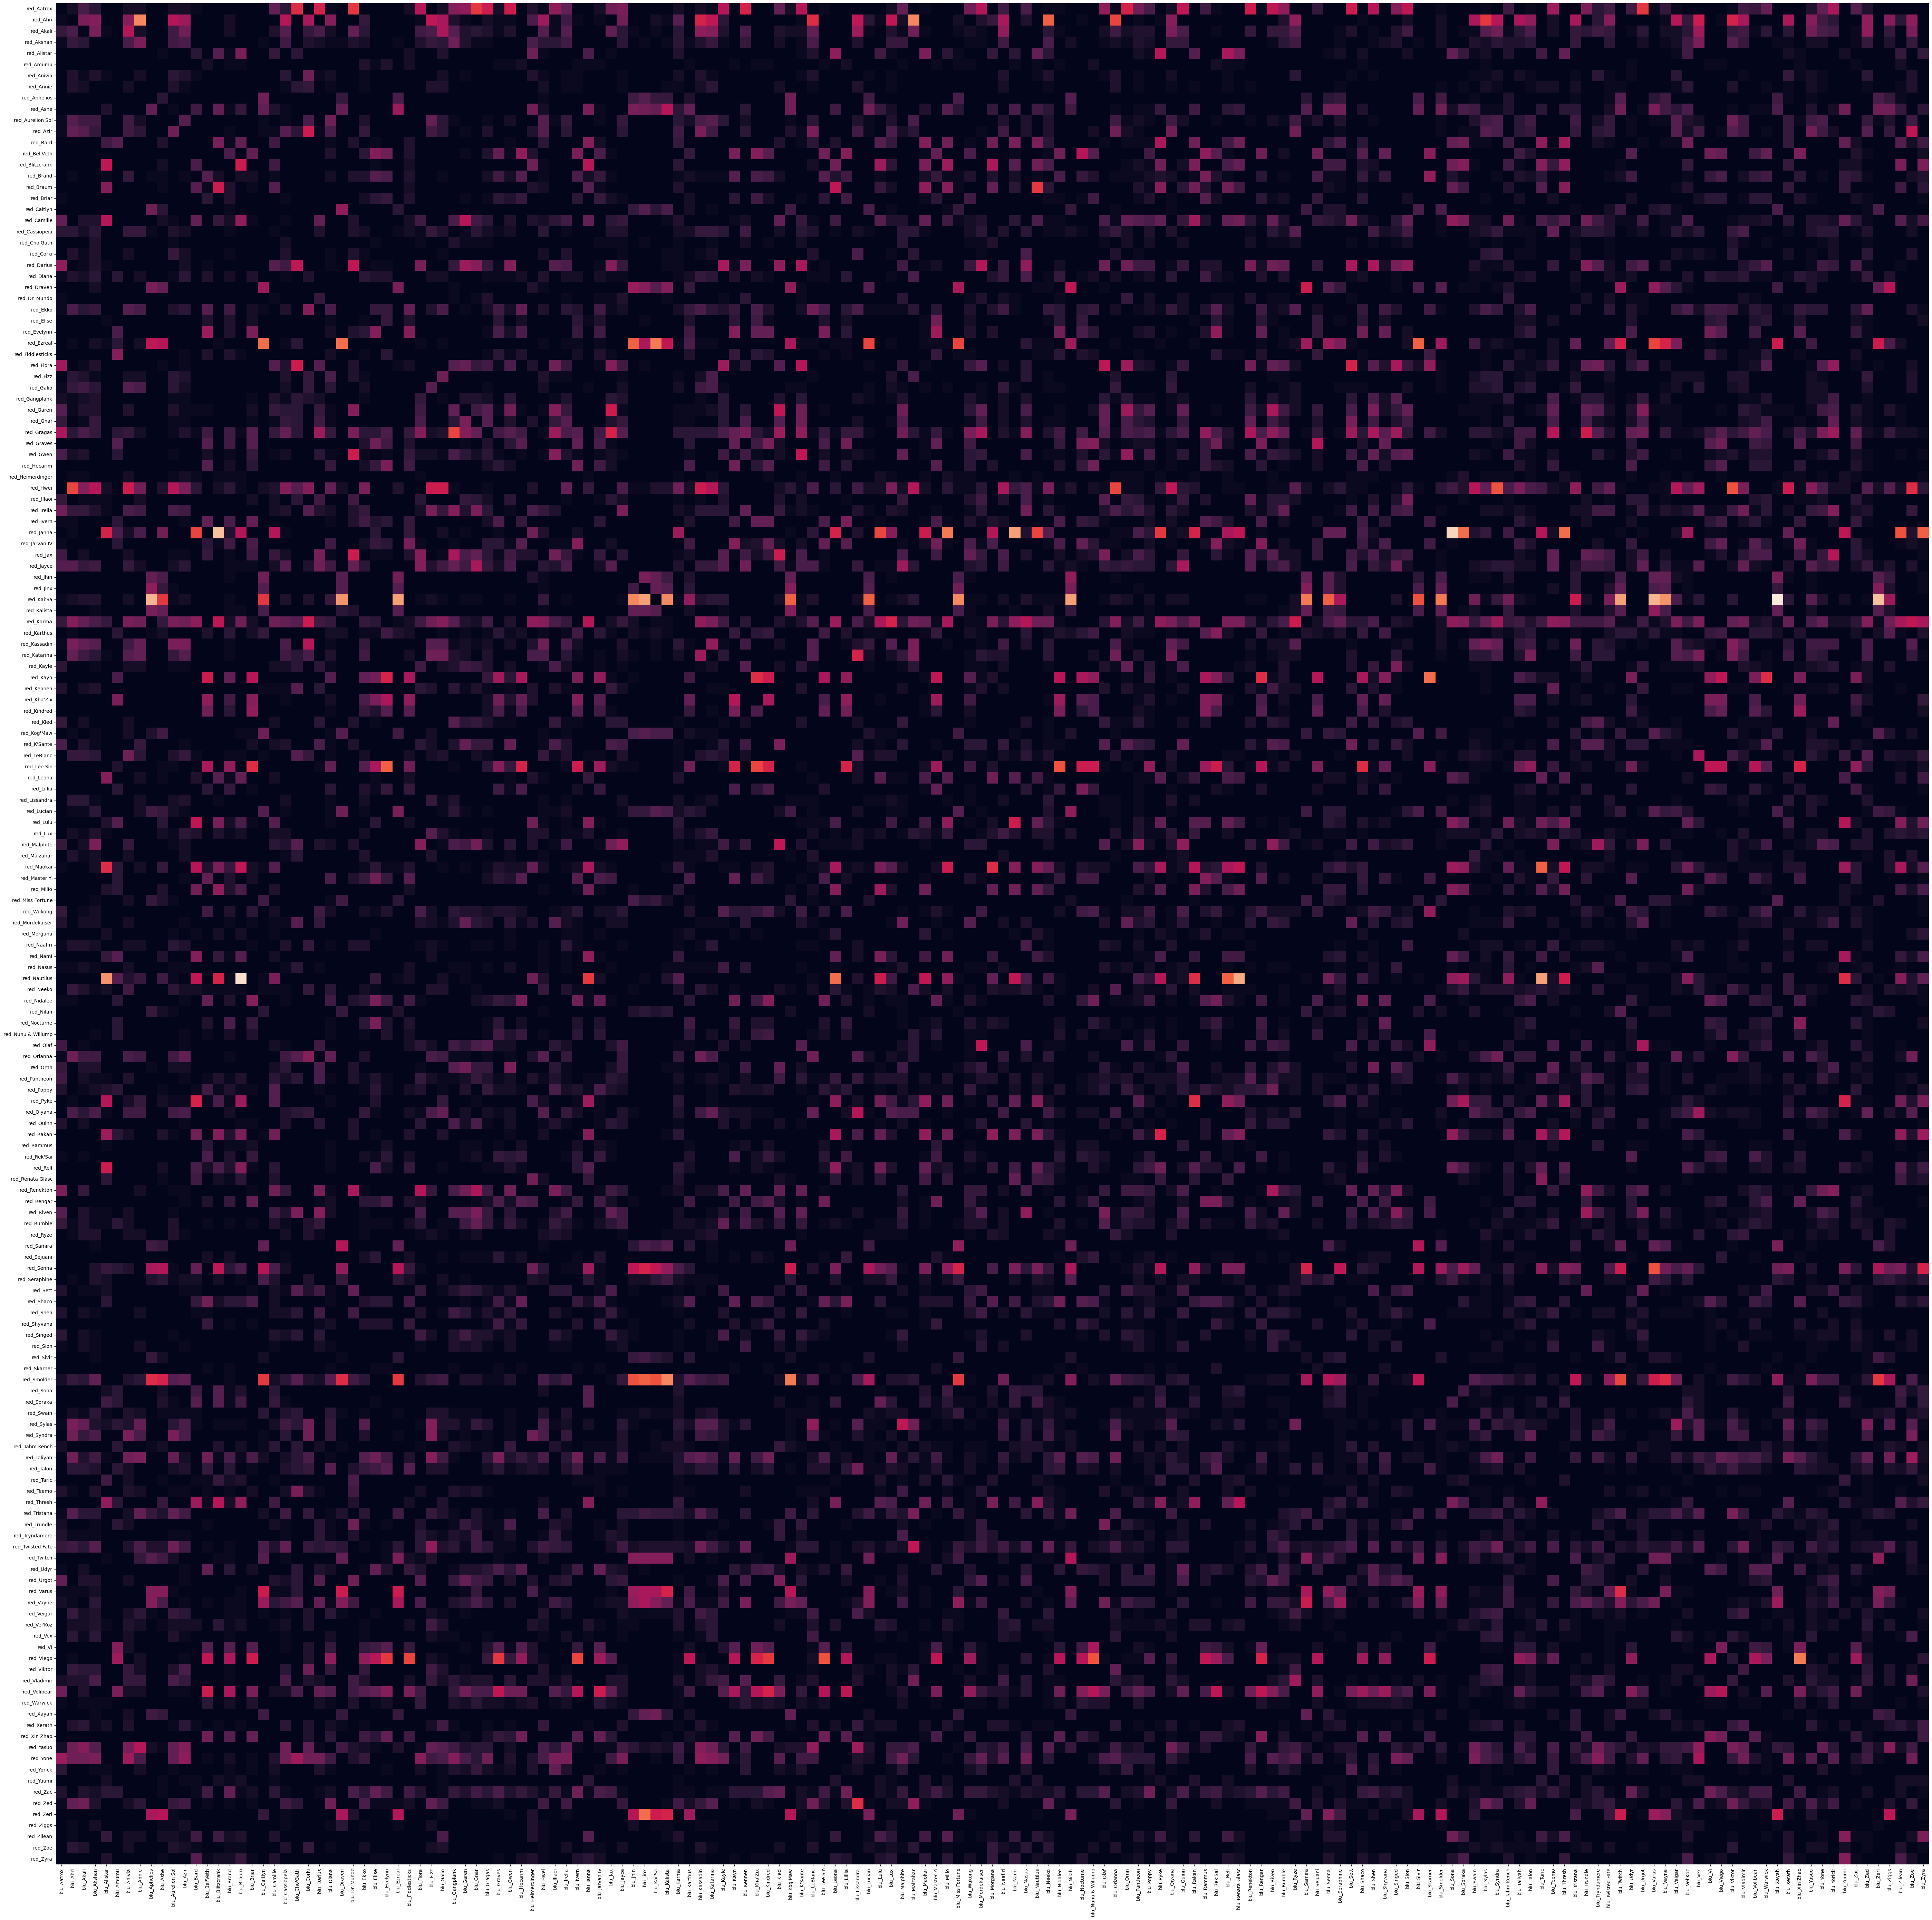

In [29]:
f, ax = plt.subplots(figsize = (70,70))
sns.heatmap(data=df_counter, ax=ax, cbar=False)

In [32]:
def Ncounter():
    """

    New counter stats fonction without side consideration.
    Always take first element of tuple of combination as reference for sorting.
    Create a matrice 166x166, axis 0 for reference champions.

    """

    password = ""
    connexion = ct.Connect_Tools(password=password)
    df_champions = connexion.read_db("champions_list")
    df_matches = connexion.read_db("matches")
    
    dict_counter = {col : {ind : [] for ind in df_champions["name_champ"]} for col in df_champions["name_champ"]}

    def verif_position(r, n):
        "Verified match-up."
        if abs(r.index(n[0]) - r.index(n[1])) == 5:
            return True
        else:
            return False
        
    def verif_win(r, n):
        "Verified win of first element of r"
        r_fe = r.index(n[0])
        r_win = r[11]

        if r_fe in range(1,6) and r_win == 0:
            return "win"
        if r_fe in range(1,6) and r_win == 1:
            return "lose"
        if r_fe in range(6,11) and r_win == 1:
            return "win"
        if r_fe in range(6,11) and r_win == 0:
            return "lose"
        else:
            return False

    for index, row in df_matches.iterrows():
        r = list(row.values)
        for n in combinations(df_champions["name_champ"], r=2):
            if all(x in r for x in n) and verif_position(r, n) == True:
                if verif_win(r, n) == "win":
                    dict_counter[n[0]][n[1]].append(1)
                    dict_counter[n[1]][n[0]].append(0)
                elif verif_win(r, n) == "lose":
                    dict_counter[n[0]][n[1]].append(0)
                    dict_counter[n[1]][n[0]].append(1)
                elif verif_win == False:
                    print("We cannot verifie win.")
            else:
                continue

    def trans_vic_rel(position):
        """
        Transform winrate of champions with minorization function for depreciate low sample in data.
        Create a representation of victory reliability.
        If sample is under 5% of all games, reliability index is degrading exponentially.
        For a sample of 15%, reliability index is close to the maximum of of its original value. 
        """

        def fonction_log(x):
            k = -np.log(0.0000000000000001)
            return 1 - np.exp(-k * x)
        
        total_games = sum(len(v) for i, v in position.items())

        for i, v in position.items():
            if len(v) == 0:
                position[i] = 0
            else:
                mean_i = sum(v)/len(v)
                x = sum(v)/total_games
                ind_min = fonction_log(x)
                n_i = round(mean_i*ind_min,2)
                position[i] = n_i

    for col, position in dict_counter.items():
        position = trans_vic_rel(position)

    df_counter = pd.DataFrame(data=dict_counter)

    return df_counter

In [33]:
test2 = Ncounter()

In [34]:
print(test2)

         Aatrox  Ahri  Akali  Akshan  Alistar  Amumu  Anivia  Annie  Aphelios  \
Aatrox     0.00  0.03   0.16    0.12     0.02    0.0    0.02   0.06      0.00   
Ahri       0.01  0.00   0.24    0.30     0.01    0.0    0.35   0.35      0.00   
Akali      0.12  0.21   0.00    0.20     0.01    0.0    0.34   0.02      0.00   
Akshan     0.03  0.12   0.10    0.00     0.00    0.0    0.19   0.23      0.00   
Alistar    0.00  0.00   0.01    0.00     0.00    0.0    0.00   0.00      0.00   
...         ...   ...    ...     ...      ...    ...     ...    ...       ...   
Zeri       0.02  0.02   0.01    0.06     0.00    0.0    0.00   0.00      0.31   
Ziggs      0.00  0.03   0.00    0.06     0.00    0.0    0.04   0.06      0.04   
Zilean     0.02  0.01   0.01    0.00     0.15    0.0    0.04   0.03      0.00   
Zoe        0.00  0.08   0.06    0.02     0.01    0.0    0.05   0.05      0.00   
Zyra       0.00  0.00   0.01    0.00     0.10    0.1    0.00   0.00      0.00   

         Ashe  ...  Yone  Y

<Axes: >

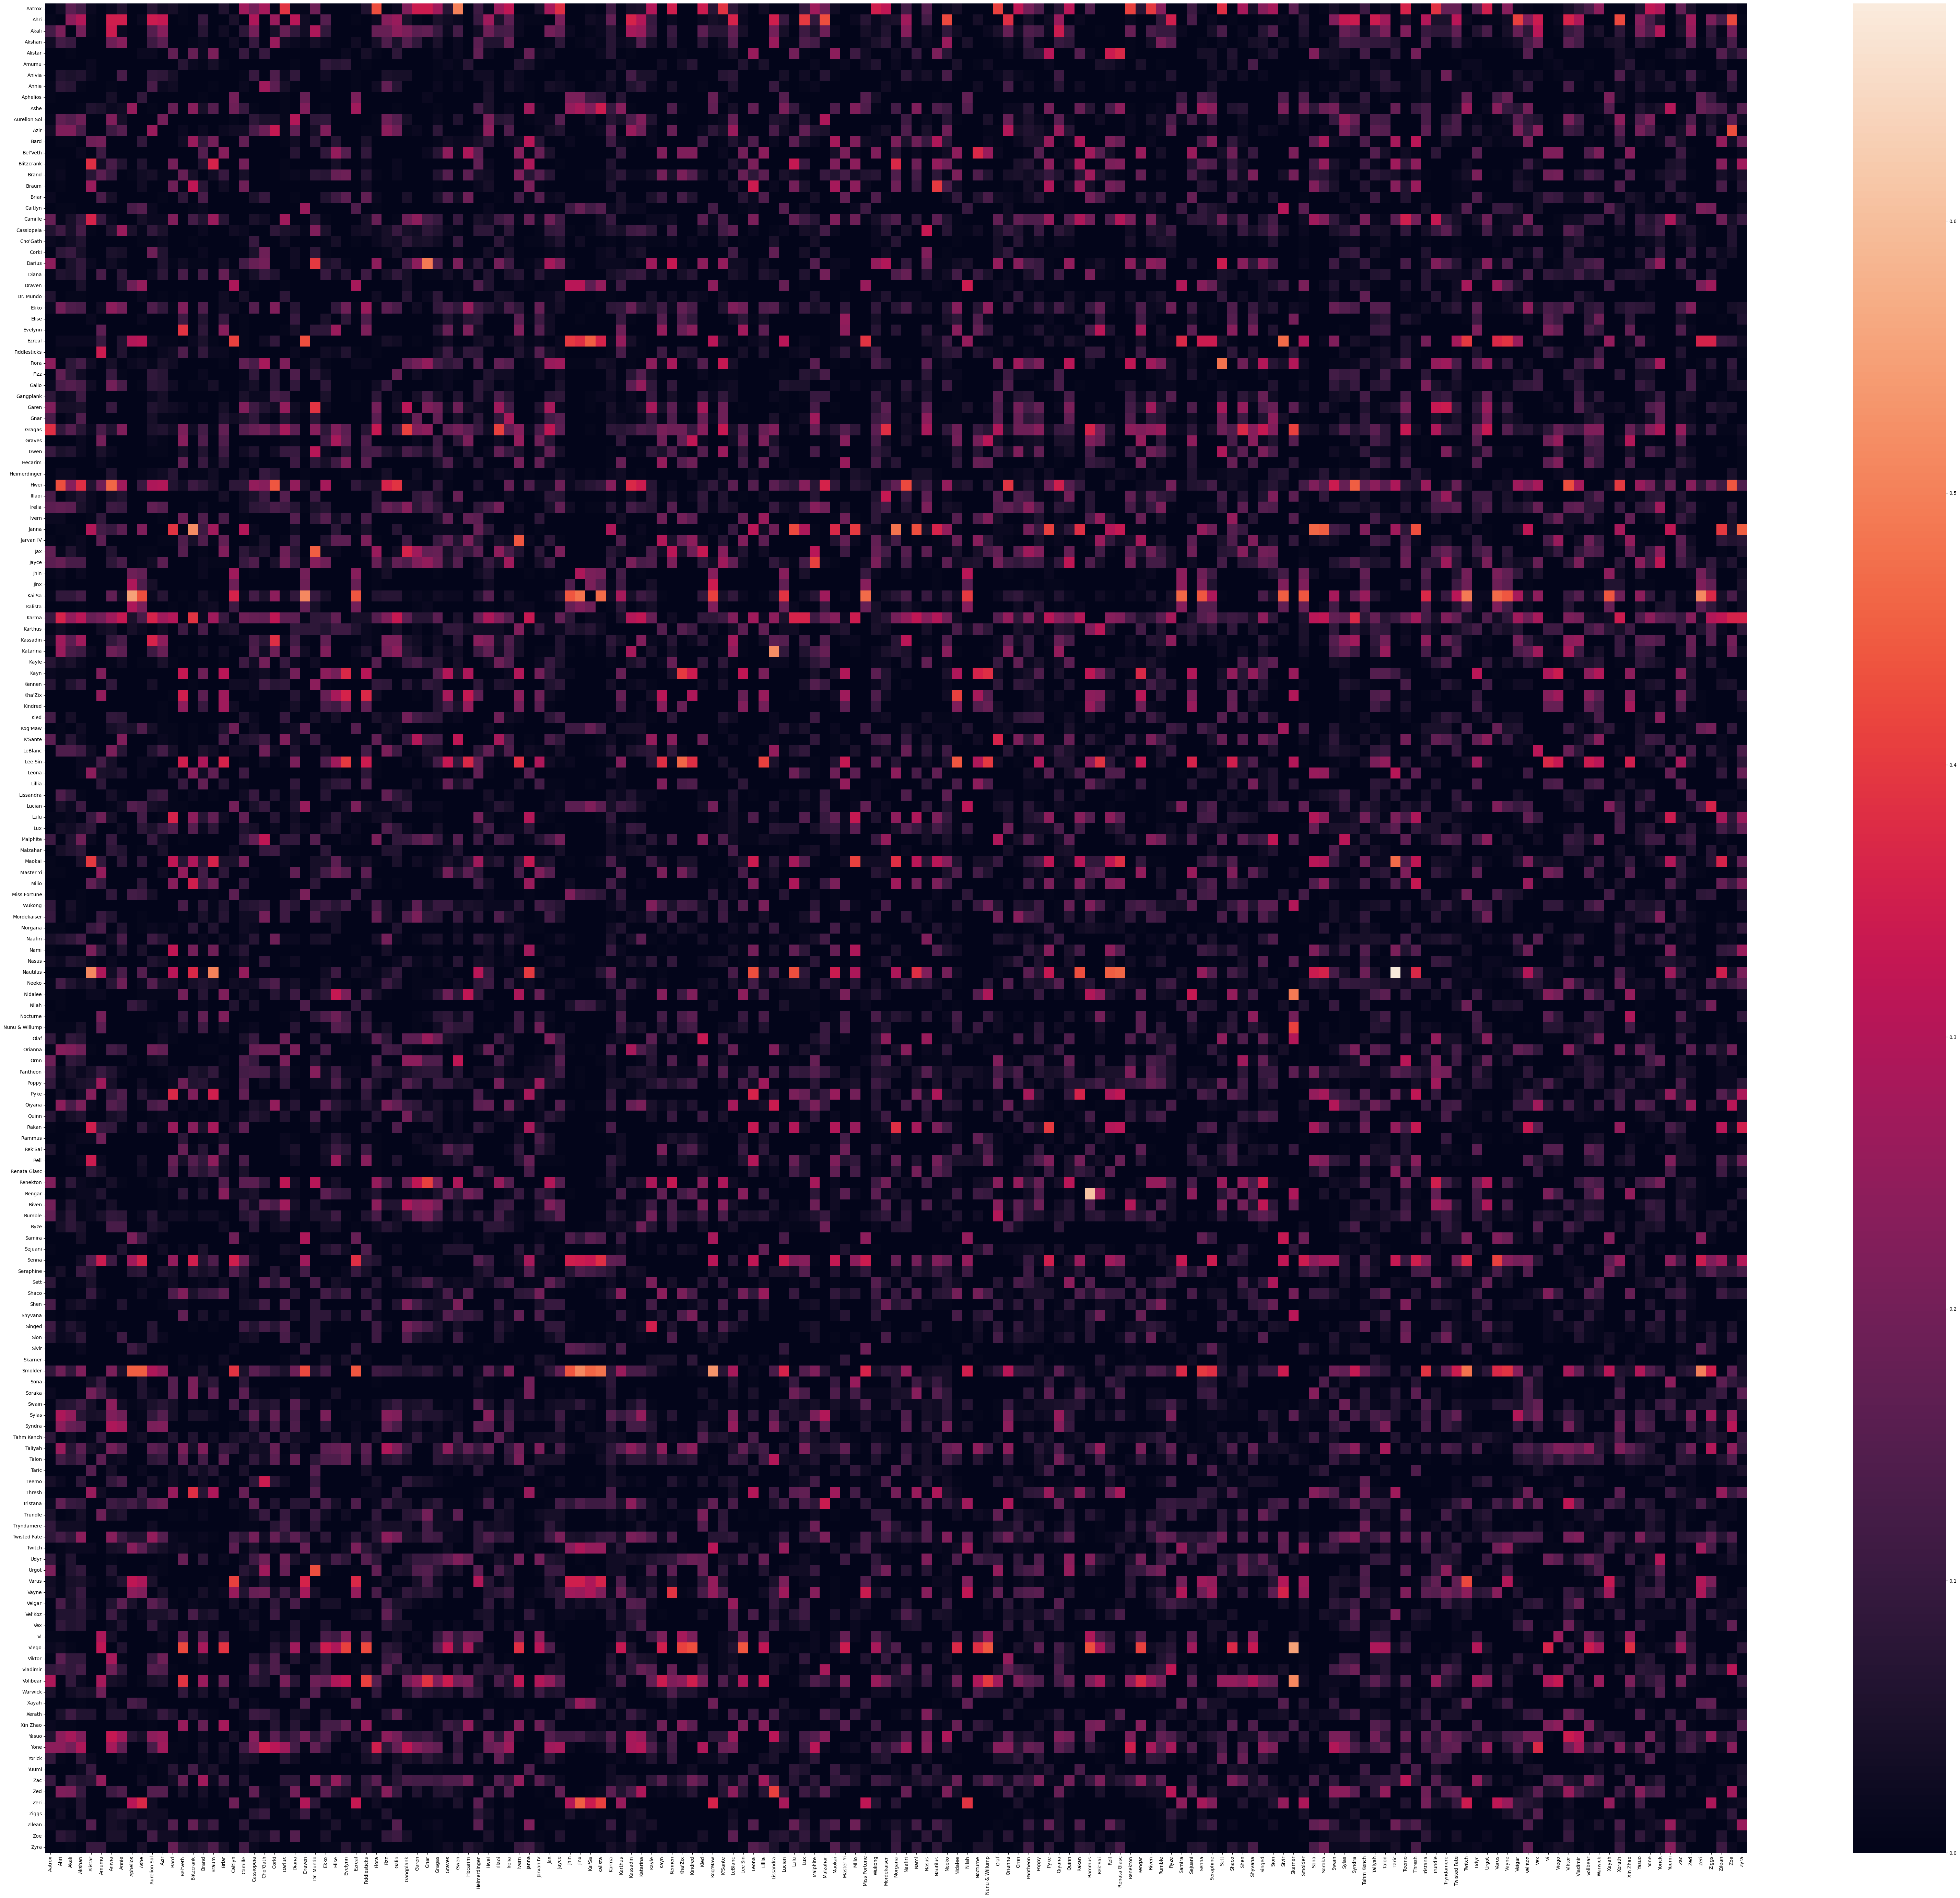

In [36]:
f, ax = plt.subplots(figsize = (80, 70))
sns.heatmap(data=test2, ax=ax, cbar=True)